<a href="https://colab.research.google.com/github/jward6301/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages and Datasets

Both datasets were selected from Kaggle. The datasets had the needed amount of numerical columns and seemed intersting to evaluate.

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [4]:
df1 = pd.read_csv('Healthcare-Diabetes.csv')
df1

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [5]:
df2 = pd.read_csv('Maternal Health Risk Data Set 2.csv')
df2

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


# 1. Simple Linear Regression:

Independent Variable (IV): BMI

Dependent Variable (DV): SkinThickness


In [6]:
# Fit the regression model

X = sm.add_constant(df1['BMI'])

model = sm.OLS(df1['SkinThickness'], X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          SkinThickness   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     506.7
Date:                Sat, 11 Nov 2023   Prob (F-statistic):          3.49e-103
Time:                        01:54:42   Log-Likelihood:                -11379.
No. Observations:                2768   AIC:                         2.276e+04
Df Residuals:                    2766   BIC:                         2.277e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3223      1.152     -3.753      0.0

In [39]:
# Checking linearity
stat, p_value = linear_rainbow(results)

print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.0913060908765337, p-value=0.05217685392469461


In [9]:
residuals = results.resid
fitted = results.fittedvalues

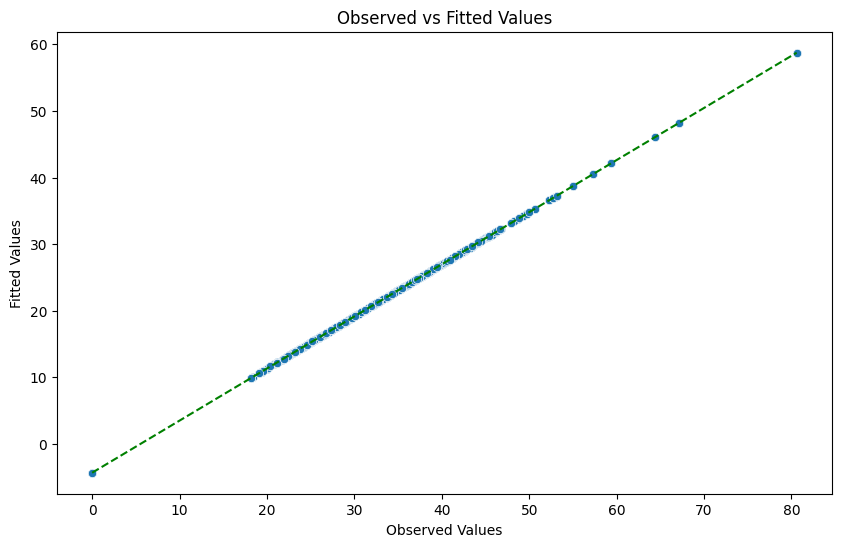

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['BMI'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df1['BMI']), max(df1['BMI'])], [min(fitted), max(fitted)], color='green', linestyle='--')
plt.show()

In [12]:
#Assessing normality
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9503020644187927, p-value=1.1651313430887151e-29


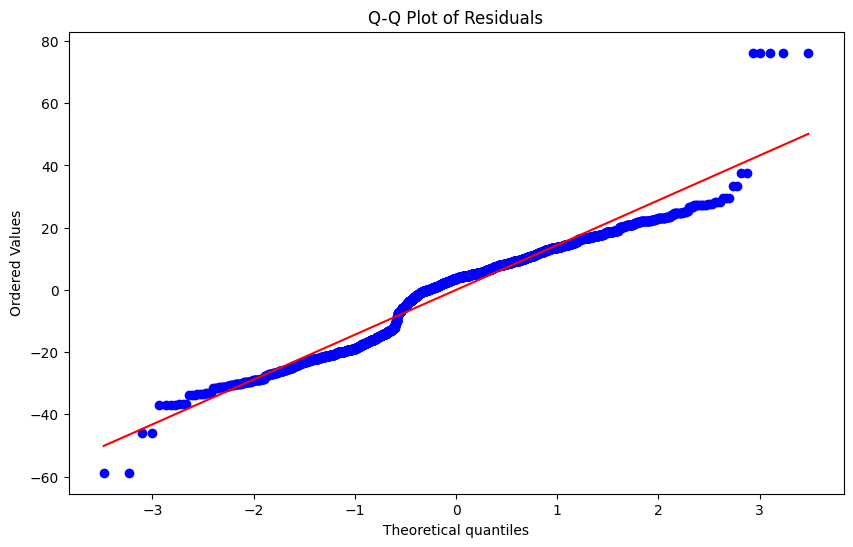

In [13]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [14]:
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.0410648359636074, p-value=0.22726586049364464


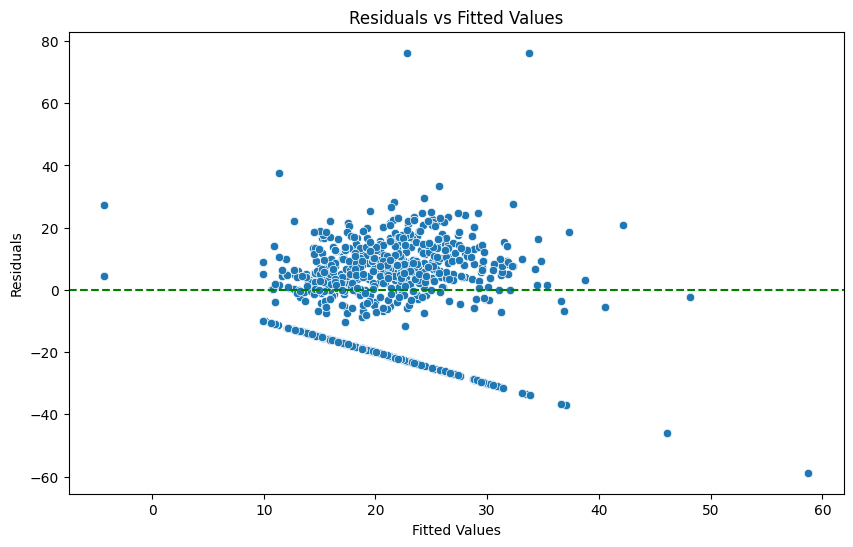

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='green', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### Evaluation:

Reasoning behind variable choices: After choosing the dataset because it had 2 variables that fit, I was interested to see the relationship between BMI and skin thickness in people being evaluated for diabetes.

Model evaluation:
* In the regression model, the r-squared value is 0.155. The closer the value is to 1, the better fit it is, and since the value is closer to , it does not indicate a strong fit of the independent variable.

Checking the assumptions:
* The Rainbow Test indicated a p-value of 0.05217685392469461. This is slightly larger than the signficance level of 0.05 which indicates a linear relationship between the IV and DV.
* The Shapiro-Wilk Test indicated a p-value of 1.1651313430887151e-29. This is smaller than the signficance level of 0.05 which indicates that is is not normally distributed.
* The Observed vs Fitted visualization indicate that it does follow a normal distribution.
* The Goldfeld-Quandt Test indiated a p-value of 0.22726586049364464. This is larger than the signficance level of 0.05 which indicates homogeneity.
* The Q-Q visualization indicated that there is not a linear relationship. There are some outliers on both ends.
* The residuals vs. fitted model indicated that some follow a linear relationship but most are scattered and unequal.

Overall it seems that the IV does not predict the DV.

# 2. Multiple Linear Regression:

Independent Variable 1 (IV1): Age

Independent Variable 2 (IV2): SystolicBP

Independent Variable 3 (IV3): DiastolicBP

Independent Variable 4 (IV4): Heart Rate

Independent Variable 4 (IV5): BodyTemp

Dependent Variable (DV): Blood Sugar (BS)

In [30]:
X = df2[['Age', 'SystolicBP', 'DiastolicBP', 'HeartRate', 'BodyTemp']]
X = sm.add_constant(X)

y = df2['BS']

model2 = sm.OLS(y, X)
results2 = model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                     BS   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     93.95
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           2.83e-81
Time:                        02:15:48   Log-Likelihood:                -2453.0
No. Observations:                1014   AIC:                             4918.
Df Residuals:                    1008   BIC:                             4948.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -19.3510      6.698     -2.889      

In [31]:
# Checking linearity

stat, p_value = linear_rainbow(results2)

print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.0524550499344303, p-value=0.28320342211563493


In [32]:
residuals2 = results2.resid
fitted2 = results2.fittedvalues

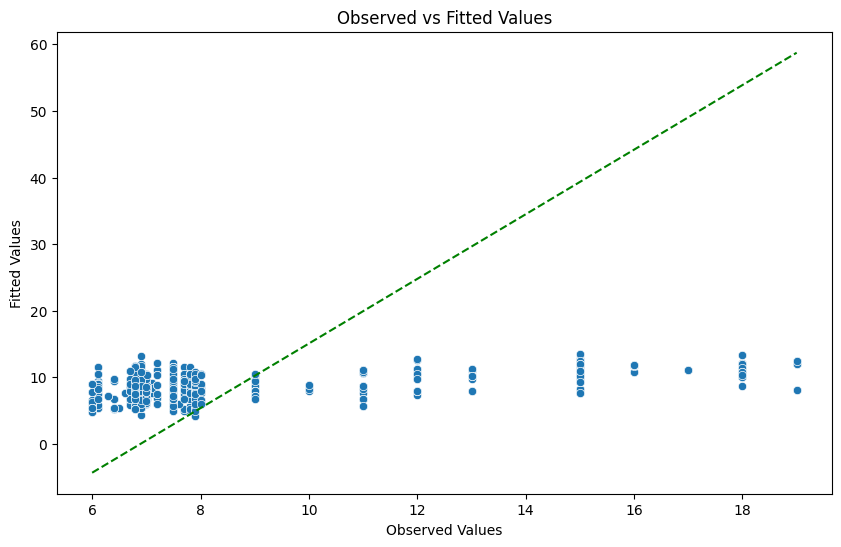

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df2['BS'], y=fitted2)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df2['BS']), max(df2['BS'])], [min(fitted), max(fitted)], color='green', linestyle='--')
plt.show()

In [34]:
W, p_value = shapiro(residuals2)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9336153268814087, p-value=8.09551406527348e-21


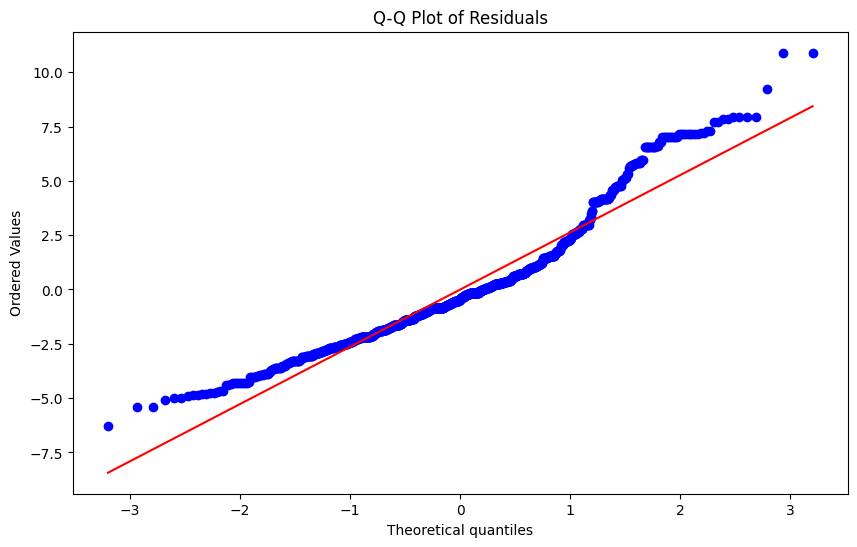

In [35]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals2, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [36]:
gq_test2 = het_goldfeldquandt(residuals2, results2.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test2[0]}, p-value={gq_test2[1]}")

Goldfeld-Quandt Test: F-statistic=0.8177043346003059, p-value=0.9877540613107132


In [37]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
      Variable          VIF
0        const  6118.600468
1          Age     1.276092
2   SystolicBP     2.752669
3  DiastolicBP     2.680928
4    HeartRate     1.026584
5     BodyTemp     1.132258


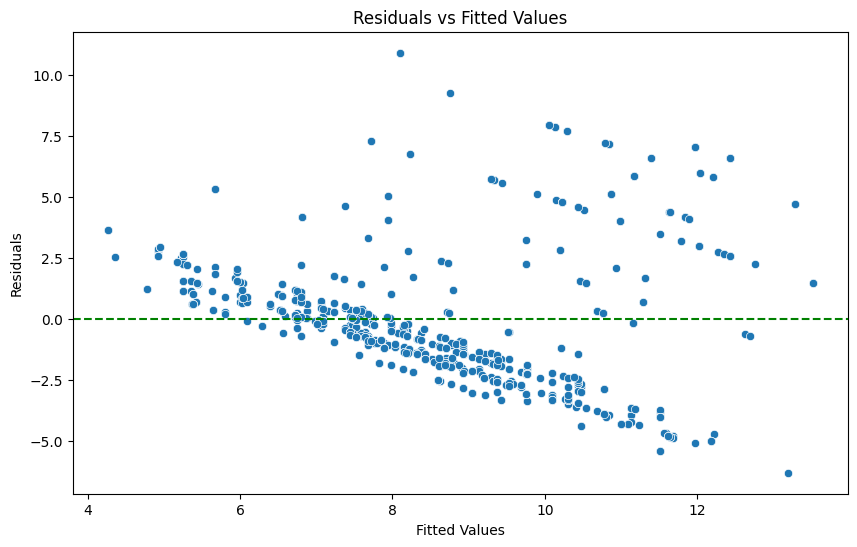

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted2, y=residuals2)
plt.axhline(0, color='green', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### Evaluation:

Reasoning behind variable choices: The dataset was selected due to it having more than 5 numberical values. The IVs and DV were selected to to my interest in how Blood Sugar can relate to the IVs.

Model evaluation:
* Based on the regression model, the r-squared value is 0.318. It is far from 1, indicating that there is not a strong fit of the IVs to the DV.  

Checking the assumptions:
* The Rainbow Test indicated a p-value of 0.28320342211563493. This is smaller than the signficance level of 0.05 which indicates there is not a linear relationship.
* The Shapiro-Wilk Test indicated a p-value of 8.09551406527348e-21. This indicates that it does not follow a normal distribution.
* The Goldfeld-Quandt Test indiated a p-value of 0.9877540613107132. This is a high p-value indicating that there is strong evidence for homogeneity.
* The Q-Q visualization indicated that the residuals do not line up with the theoretical distribution line, but follow closely to it.
* The Observed vs Fitted visualization indicate that it does not follow a normal distribution.
* The residuals vs. fitted model indicated that some follow a linear relationship but there is some that are unequal.


Overall it seems that the IVs do not predict the DV.